## **Part 1**

In [103]:
import pandas as pd
from datetime import timedelta
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

### **Task 3.0**

#### *Processing data to delete duplicates*

In [104]:
dirty_data = pd.DataFrame(pd.read_csv("Файл 1 - Файл 1.csv"))
pure_data = dirty_data.where(dirty_data['product_id']=='tenwords_1w_9.99_offer').drop_duplicates().dropna(how='all')
pure_data['purchase_date']=pd.to_datetime(pure_data['purchase_date'])
pure_data

,user_id,product_id,trial,refunded,purchase_date,country_code,media_source
1,2604470.0,tenwords_1w_9.99_offer,False,False,2020-09-29,UK,Facebook Ads
2,2274467.0,tenwords_1w_9.99_offer,False,False,2020-08-18,Organic/Unknown,Organic/Unknown
4,2571294.0,tenwords_1w_9.99_offer,False,False,2020-09-25,US,Google Ads
5,2217390.0,tenwords_1w_9.99_offer,False,False,2020-09-05,MX,Facebook Ads
6,2086438.0,tenwords_1w_9.99_offer,False,False,2020-07-28,US,Facebook Ads
...,...,...,...,...,...,...,...
58089,2327622.0,tenwords_1w_9.99_offer,False,False,2020-09-15,US,Facebook Ads
58090,2327622.0,tenwords_1w_9.99_offer,False,False,2020-09-22,US,Facebook Ads
58091,2083410.0,tenwords_1w_9.99_offer,False,False,2020-07-27,US,Facebook Ads
58092,2083410.0,tenwords_1w_9.99_offer,False,False,2020-07-20,US,Facebook Ads


In [105]:
#Function to check convertion from trial to second succesful payment

def checker(date, data, userid, payment):
    new_data = pd.DataFrame(data[(data['user_id']==userid) & (data['trial']==True)])
    #print(new_data)
    #print(userid)
    if payment==1:
        new_data['new_date'] = pd.DataFrame(pd.to_datetime(new_data['purchase_date']) + timedelta(days = 7))
    else:
        new_data['new_date'] = pd.DataFrame(pd.to_datetime(new_data['purchase_date']) + timedelta(days = 14))
    dater = pd.DataFrame({'dater': [date]})
    dater['dater'] = pd.to_datetime(dater['dater'])
    #print(new_data)
    #print(dater)
    #print(dater['dater'].isin(new_data['new_date'])[0])
    return dater['dater'].isin(new_data['new_date'])[0]

#### *Calculating data via pandas*

In [106]:
print('Trial periods: ', pure_data.where(pure_data['trial']==True).dropna(how='all').shape[0])
users = pure_data['user_id'].where(pure_data['trial']==True).dropna(how='all')
#print(users)
#checker(pure_data, 2010478, 1, False)
print('Payments immediately after trial including refunded ones: ',
    pure_data.where((pure_data['trial']==False) & (pure_data['user_id'].isin(users))).dropna(how='all').apply(lambda row: checker(row['purchase_date'], pure_data, row['user_id'], 
                                                              1), axis=1).reset_index(name = 'checker')['checker'].value_counts()[True])
print('Second payments after trial including refunded ones: ',
    pure_data.where((pure_data['trial']==False) & (pure_data['user_id'].isin(users))).dropna(how='all').apply(lambda row: checker(row['purchase_date'], pure_data, row['user_id'], 
                                                              2), axis=1).reset_index(name = 'checker')['checker'].value_counts()[True])
print('Payments immediately after trial excluding refunded ones: ',
    pure_data.where((pure_data['refunded']==False) & (pure_data['trial']==False) & (pure_data['user_id'].isin(users))).dropna(how='all').apply(lambda row: checker(row['purchase_date'], pure_data, row['user_id'], 
                                                              1), axis=1).reset_index(name = 'checker')['checker'].value_counts()[True])
print('Second payments after trial excluding refunded ones: ',
    pure_data.where((pure_data['refunded']==False) & (pure_data['trial']==False) & (pure_data['user_id'].isin(users))).dropna(how='all').apply(lambda row: checker(row['purchase_date'], pure_data, row['user_id'], 
                                                              2), axis=1).reset_index(name = 'checker')['checker'].value_counts()[True])
#users = pure_data['user_id'].where(pure_data['trial']==True).dropna(how='all')
#trials = pure_data[['user_id', 'purchase_date']].where(pure_data['user_id'].isin(users) & pure_data['trial']==True).dropna(how='all')
#trials['purchase_date'] = trials['purchase_date'] + pd.Timedelta(days = 7)
#trial_data = pure_data.where(pure_data['user_id'].isin(users)).dropna(how='all').sort_values(by=['user_id', 'purchase_date'])
#print(trial_data.where(trial_data[]).dropna(how='all').shape[0])

Trial periods:  15
Payments immediately after trial including refunded ones:  4
Second payments after trial including refunded ones:  3
Payments immediately after trial excluding refunded ones:  4
Second payments after trial excluding refunded ones:  2


### **Task 3.1**

#### *Current data*

In [107]:
print('Trial users: ', pure_data.where(pure_data['trial']==True).dropna(how='all').shape[0])
print('Trial refunds: ', pure_data.where((pure_data['trial']==True) & (pure_data['refunded']==True)).dropna(how='all').shape[0])
print('Unique subscription payments: ', pure_data.where(pure_data['trial']==False).dropna(how='all').shape[0])
print('Refund cases: ', pure_data.where((pure_data['trial']==False) & (pure_data['refunded']==True)).dropna(how='all').shape[0])
print('Unique users: ', len(pd.unique(pure_data['user_id'])))


Trial users:  15


Trial refunds:  0
Unique subscription payments:  40256
Refund cases:  1676
Unique users:  18014


In [108]:
no_trial = pd.DataFrame(pure_data['user_id'].where(pure_data['trial']==False).dropna(how='all').value_counts())
counter = pd.DataFrame(no_trial['count'].value_counts())
counter['overall'] = counter['count']*counter.index
counter.index.rename('Subscription periods per user', inplace=True)
print('Unique subscription payments: ', sum(counter['overall']))
print('Unique users without trial: ', pure_data[pure_data['trial']==False]['user_id'].nunique())
print('Subscription duration per users')
counter

Unique subscription payments:  40256


Unique users without trial:  18003
Subscription duration per users


,count,overall
Subscription periods per user,,
1,11394,11394
2,2239,4478
3,1294,3882
4,824,3296
5,520,2600
6,412,2472
7,315,2205
8,265,2120
11,215,2365


#### *New unique users prediction*

In [109]:
#Dataset processing

new_users_prediction = pd.DataFrame(pure_data.groupby('user_id')['purchase_date'].min().reset_index(name='first_date'))
#new_users_prediction = pd.DataFrame(pure_data[pure_data['trial']==False].groupby('user_id')['purchase_date'].min().reset_index(name='first_date'))
new_users_prediction = pd.DataFrame(new_users_prediction.groupby('first_date').size().reset_index(name='new_users'))
#new_users_prediction['new_users'].mean()

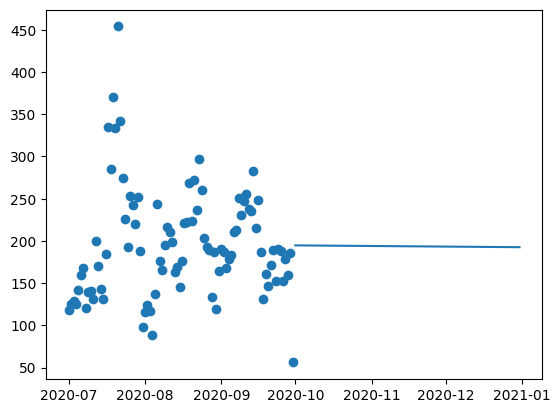

Predicted unique users for half-year period:  35828.672102091456


In [110]:
#Linear regression

new_users_prediction.first_date = pd.to_datetime(new_users_prediction.first_date)
reg = LinearRegression()
reg.fit(new_users_prediction.first_date.values.reshape(-1, 1), new_users_prediction['new_users'].values.reshape(-1, 1))

new_dates = pd.DataFrame({'new_dates': pd.to_datetime(pd.date_range(start='2020-10-01', end='2020-12-31', freq='D', inclusive='both'))})
new_users = reg.predict(new_dates['new_dates'].values.astype(float).reshape(-1, 1))


plt.plot(new_dates, new_users)
plt.scatter(new_users_prediction['first_date'], new_users_prediction['new_users'])
plt.show()

print('Predicted unique users for half-year period: ', (sum(new_users)+sum(new_users_prediction['new_users']))[0])

#### *New subscription payments prediction*

In [111]:
#Dataset processing

subs_prediction = pd.DataFrame(pure_data[pure_data['trial']==False].groupby('purchase_date').size().reset_index(name='payments'))
#subs_prediction['payments'].max()

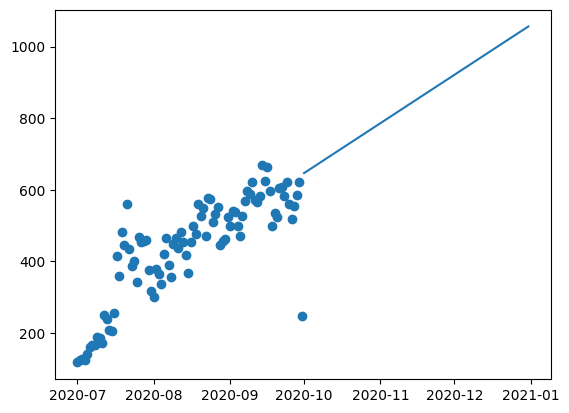

Predicted number of subscription payments:  118577.10599078459


In [112]:
#Linear regression

subs_prediction.purchase_date = pd.to_datetime(subs_prediction.purchase_date)
reg = LinearRegression()
reg.fit(subs_prediction.purchase_date.values.reshape(-1, 1), subs_prediction['payments'].values.reshape(-1, 1))

new_dates = pd.DataFrame({'new_dates': pd.to_datetime(pd.date_range(start='2020-10-01', end='2020-12-31', freq='D', inclusive='both'))})
new_subs = reg.predict(new_dates['new_dates'].values.astype(float).reshape(-1, 1))


plt.plot(new_dates, new_subs)
plt.scatter(subs_prediction['purchase_date'], subs_prediction['payments'])
plt.show()

print('Predicted number of subscription payments: ', (sum(new_subs)+sum(subs_prediction['payments']))[0])

#### *New refund cases prediction*

In [113]:
#Data processing

ref_prediction=pure_data[(pure_data['trial']==False)].groupby('purchase_date')['refunded'].apply(lambda x: (x==True).sum()).reset_index(name='refunds_number')

#ref_prediction = pd.DataFrame(pure_data[(pure_data['trial']==False)].groupby('purchase_date')['refunded'].value_counts().reset_index(name='refunds_number'))
#ref_prediction = pd.DataFrame(ref_prediction[['purchase_date', 'refunds_number']][ref_prediction['refunded']==True])
ref_prediction

,purchase_date,refunds_number
0,2020-07-01,4
1,2020-07-02,1
2,2020-07-03,1
3,2020-07-04,2
4,2020-07-05,1
...,...,...
87,2020-09-26,19
88,2020-09-27,20
89,2020-09-28,16
90,2020-09-29,26


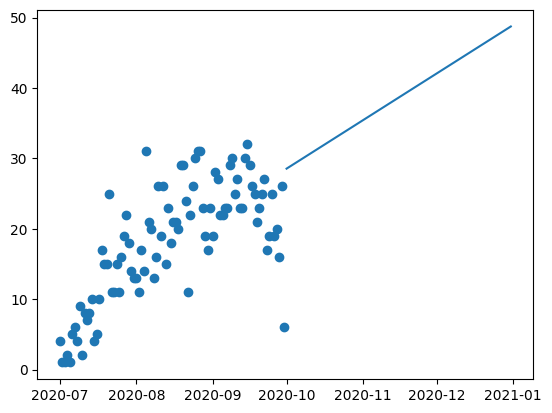

Prediction of refund cases:  5230.221907125131


In [114]:
#Linear regression

ref_prediction.purchase_date = pd.to_datetime(ref_prediction.purchase_date)
reg = LinearRegression()
reg.fit(ref_prediction.purchase_date.values.reshape(-1, 1), ref_prediction['refunds_number'].values.reshape(-1, 1))

new_dates = pd.DataFrame({'new_dates': pd.to_datetime(pd.date_range(start='2020-10-01', end='2020-12-31', freq='D', inclusive='both'))})
new_refs = reg.predict(new_dates['new_dates'].values.astype(float).reshape(-1, 1))


plt.plot(new_dates, new_refs)
plt.scatter(ref_prediction['purchase_date'], ref_prediction['refunds_number'])
plt.show()

print('Prediction of refund cases: ', (sum(new_refs)+sum(ref_prediction['refunds_number']))[0])